# Logistic Regression on City Service Satisfaction Survey

The City of Somerville sends out a happiness survey to a random sample of Somerville residents asking them to rate their personal happiness and their satisfaction with City services. This combined dataset includes the survey responses from 2011, 2013, and 2015


The Attributes (features) Information:

X1 = the availability of information about the city services

X2 = the cost of housing 

X3 = the overall quality of public schools 

X4 = your trust in the local police 

X5 = the maintenance of streets and sidewalks 

X6 = the availability of social community events 

All Attributes X1 to X6 have values 1 to 5.

The Target information:

D = decision attribute (D) with values 0 (unhappy) and 1 (happy) 

'''
    

# The task for me was creating a classifier that can predict if a person is happy or unhappy given their response for the city service features

In [2]:
pwd

'/Users/jja'

In [3]:
cd Downloads

/Users/jja/Downloads


In [54]:
import pandas as pd
data = pd.read_csv('happiness.csv' )

In [55]:
#The data has 143 rows and 7 columns
#This corresponds to the 6 features and 1 target variable
data.shape

(143, 7)

In [56]:
#We take a look at the data
data.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [57]:
#I check and remove any missing values
data = data.dropna()
data.shape
#The dataframe is still the same length. So no missing values

(143, 7)

In [67]:
#Here I will change the column names to be more descriptive than just a bunch of Xs
data.columns =['happy','service_information', 'housing_cost', 'public_schools', 'local_police', 'streets_sidewalks', 'community_events']

In [68]:
#I split the data into features and targets:
data_features = data.iloc[:, 1:]
print(data_features.head())
data_target = data.iloc[:,[0]] #Wrap the 0 in [] to return a dataframe
print(data_target.head())

   service_information  housing_cost  public_schools  local_police  \
0                    3             3               3             4   
1                    3             2               3             5   
2                    5             3               3             3   
3                    5             4               3             3   
4                    5             4               3             3   

   streets_sidewalks  community_events  
0                  2                 4  
1                  4                 3  
2                  3                 5  
3                  3                 5  
4                  3                 5  
   happy
0      0
1      0
2      1
3      0
4      0


In [74]:
#I aggregate the data to see the mean:
#People have highest satisfaction wth service information (mean of 4.31 out of 5), 
#followed by community events(mean 4.22).
#People were least satisfied with housing cost (mean of 2.54)
data.describe()

,happy,service_information,housing_cost,public_schools,local_police,streets_sidewalks,community_events
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.538462,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783
std,0.500271,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [71]:
#We see that slightly more people were happy rather than unhappy with their city services,
#But we almost have a 50/50 split
data_target['happy'].value_counts()

1    77
0    66
Name: happy, dtype: int64

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

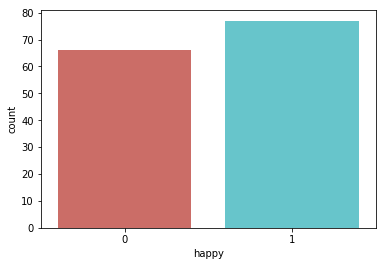

In [72]:
sns.countplot(x='happy', data = data_target, palette = 'hls')
plt.show()

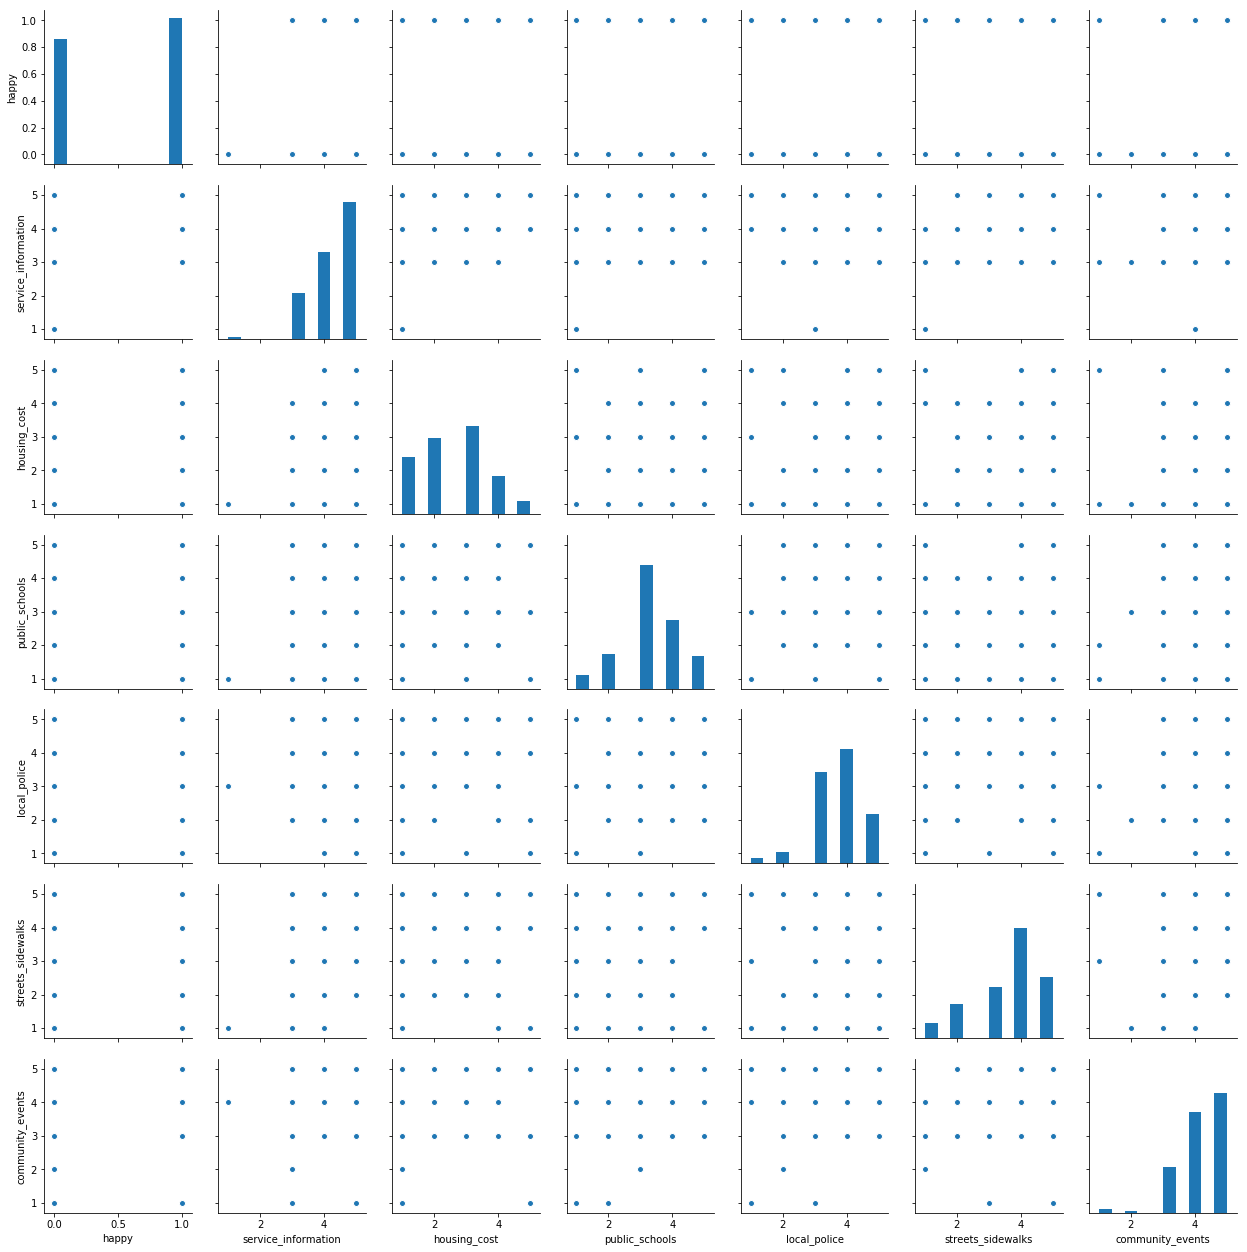

In [82]:
#I draw a pairplot to see if happiness is most related to a specific feature
#The top row is where I focus.
#Across all the features there is both happy and unhappy ratings for ratings of 1 to 5 for the features.
#No clear conclusions from pairplot
sns.pairplot(data)

In [85]:
#Correlation score does not show any strong correlation (above 0.5) between any of the features
#This is helpful for the regression to avoid Colinearity
data.corr()

,happy,service_information,housing_cost,public_schools,local_police,streets_sidewalks,community_events
happy,1.000000,0.312740,0.019368,0.163639,0.113356,0.206685,0.220729
service_information,0.312740,1.000000,0.092676,0.301971,0.104378,0.399203,0.417521
housing_cost,0.019368,0.092676,1.000000,0.181081,0.107432,-0.002141,0.024546
public_schools,0.163639,0.301971,0.181081,1.000000,0.298898,0.329874,0.207006
local_police,0.113356,0.104378,0.107432,0.298898,1.000000,0.269420,0.199151
streets_sidewalks,0.206685,0.399203,-0.002141,0.329874,0.269420,1.000000,0.307402
community_events,0.220729,0.417521,0.024546,0.207006,0.199151,0.307402,1.000000


In [100]:
#Time to do the logistic regression
#Import train test split to create training and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#We split the data
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target['happy'], 
                                                    test_size=0.3, random_state=0)
logreg = LogisticRegression() #We create logistic regressor object
logreg.fit(X_train, y_train) #We fit the training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
#We predict on test data and compute an accuracy score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


The prediction is not so great. The model predicts correctly just a little over half of the time

In [102]:
#We use the confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 4 15]
 [ 3 21]]


The result is telling us that the:
Model predicted only 4 + 21 = 25 test data correct, and 
Model predicted wrongly 3 + 15 = 18 test data incorrectly.

In [103]:
#I also compute the precision recall:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.57      0.21      0.31        19
          1       0.58      0.88      0.70        24

avg / total       0.58      0.58      0.53        43



The precision is the ability of the classifier to not label a sample as positive if it is negative.
The recall is the ability of the classifier to find all the positive samples.
Interpretation: The output tells us that of the entire test set, 58% were predicted accurately. 
The recall score shows that the true positive rate was 88% for happiness, but 21% for unhappy. This means we have a lower count of false negatives, but a higher count of false positives. 

My conclusion from the precision score and the logistic regression output is that it is hard for a model to predict whether a person is happy or unhappy based on people's response in this data set.
We saw hints of this from the begining in the scatterplot: there was no clear correlation between happiness and any of the features. People are going to be happy or unhappy with their city services regardless of their individual responses to the features.